In [73]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_close
set_matplotlib_close(False)

In [74]:
data = pd.read_csv('titanic.csv')

In [24]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [75]:
survivors = data[data['Survived'] == 1]
deceased = data[data['Survived'] == 0]

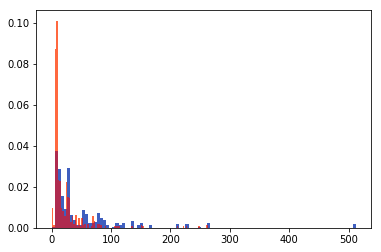

In [40]:
#plt.hist(data['Fare'], bins=100)
plt.hist(survivors['Fare'], density=True, bins=100, color='blue', alpha=0.5)
plt.hist(deceased['Fare'], density=True, bins=100, color='red', alpha=0.5)
plt.show()
#plt.close()

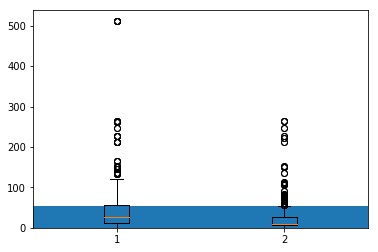

In [81]:
plt.boxplot([survivors.Fare,deceased.Fare])
plt.show()
plt.close()

In [77]:
survivors.Fare.max()

512.3292

In [78]:
survivors[survivors.Fare > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [67]:
by_class = data.groupby(['Pclass','Survived']).PassengerId.count().reset_index()
by_class_pivot = by_class.pivot(columns='Survived', index='Pclass', values='PassengerId').reset_index()
by_class_pivot.columns = ['Pclass','Casualties','Survivors']
by_class_pivot.index = ['First','Second','Third']
by_class_pivot
#shoe_counts_pivot = shoe_counts.pivot(columns='shoe_color',index='shoe_type',values='id').reset_index()

,Pclass,Casualties,Survivors
First,1,80,136
Second,2,97,87
Third,3,372,119


In [70]:
by_class_pivot['total'] = by_class_pivot.Casualties + by_class_pivot.Survivors
by_class_pivot['frac_survived'] = by_class_pivot.Survivors/by_class_pivot.total
by_class_pivot

,Pclass,Casualties,Survivors,total,frac_survived
First,1,80,136,216,0.629630
Second,2,97,87,184,0.472826
Third,3,372,119,491,0.242363


In [71]:
fare_by_class = data.groupby('Pclass').Fare.mean().reset_index()
fare_by_class

,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


In [72]:
fare_by_survival = data.groupby('Pclass').Fare.mean().reset_index()
fare_by_survival = data.groupby('Survived').Fare.mean().reset_index()
fare_by_survival

,Survived,Fare
0,0,22.117887
1,1,48.395408


In [79]:
by_embarked = data.groupby(['Embarked','Survived']).Fare.mean().reset_index()
by_embarked

,Embarked,Survived,Fare
0,C,0,35.443335
1,C,1,79.720926
2,Q,0,13.335904
3,Q,1,13.182227
4,S,0,20.743987
5,S,1,39.547081


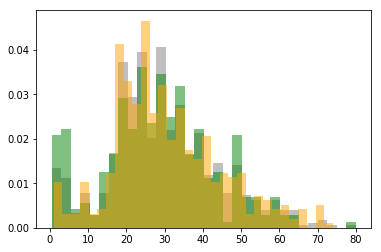

In [86]:
plt.close()
plt.hist(data.Age, density=True, bins=32, color='grey', alpha=0.5)
plt.hist(survivors.Age, density=True, bins=32, color='green', alpha=0.5)
plt.hist(deceased.Age, density=True,bins=32, color='orange', alpha=0.5)
plt.show()

In [88]:
class_embark = data.groupby(['Pclass','Embarked']).PassengerId.count().reset_index()
class_embark

,Pclass,Embarked,PassengerId
0,1,C,85
1,1,Q,2
2,1,S,127
3,2,C,17
4,2,Q,3
5,2,S,164
6,3,C,66
7,3,Q,72
8,3,S,353


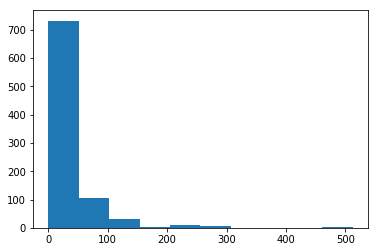

In [89]:
plt.close()
plt.hist(data.Fare)
plt.show()